In [76]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [51]:
def load_json(path:str) -> dict:
    with open(path) as f:
        data = json.load(f)
    return data

In [52]:
DATA = "../data/shaun-songs.json"

In [53]:
UTC_offset = 10

In [57]:
def pre_process(data_path, UTC_offset):    
    # load data
    songsDic = load_json(data_path)
    
    # Create df
    df = pd.DataFrame.from_dict(songsDic["Items"])

    # Add time information
    df['time'] = pd.to_datetime(df['unix_time'], unit="s") + pd.DateOffset(hours=UTC_offset)
    df['month'] = df['time'].dt.month
    df['weekday'] = df['time'].dt.dayofweek
    df['day_of_year'] = df['time'].dt.dayofyear
    df.set_index('time', inplace=True)
    df['hour_of_day'] = df.index.hour

    df["artist"] = [s.split("-")[-1].strip() for s in df.name]
    # need to sort so pandas doesnt break 
    df.sort_values(by="time",ascending=True, inplace=True)
    
    return df

In [58]:
df = pre_process(DATA, UTC_offset)

In [59]:
df.tail(n=2)

,user,songId,played_at,id,name,unix_time,month,weekday,day_of_year,hour_of_day,artist
time,,,,,,,,,,,
2021-11-13 10:16:09.493999958,1231014939,4YHhfMPAkYFiaIUcScCGnE,Sat Nov 13 00:16:09 2021,01297b0b-1598-422d-a388-254f18f88353,Rum & Cola - GoodLuck,1.636763e+09,11,5,317,10,GoodLuck
2021-11-13 10:19:21.532000064,1231014939,1VRPk6jTWnmKGdXGWqC9WZ,Sat Nov 13 00:19:21 2021,43907417-88f5-40d7-93f5-ced1966095b7,No One Has To Know - Adam Kahati X Deerock Rem...,1.636763e+09,11,5,317,10,GoldFish


# Artists Information 

In [66]:
artists_listend_count = df['artist'].value_counts()

In [75]:
print(f"Unique artists listend too {len(artists_listend_count)}")

Unique artists listend too 1377


## Top 15 Artists
Top 15 artists broken down by play count

<AxesSubplot:ylabel='artist'>

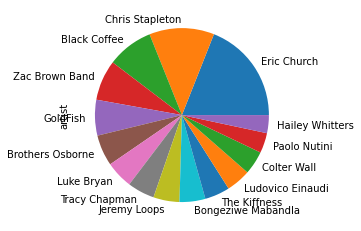

In [67]:
# https://datascienceparichay.com/article/plot-pie-chart-matplotlib/

# Need to group the less then 10 songs in a section or something

artists_listend_count.head(n=15).plot(kind='pie')

In [90]:
artists_listend_count.head(n=15)

Eric Church           392
Chris Stapleton       249
Black Coffee          177
Zac Brown Band        155
GoldFish              137
Brothers Osborne      119
Luke Bryan            105
Tracy Chapman         104
Jeremy Loops          100
Bongeziwe Mabandla     99
The Kiffness           96
Ludovico Einaudi       94
Colter Wall            90
Paolo Nutini           77
Hailey Whitters        69
Name: artist, dtype: int64

## TODO Variety
Need a plt to sure variaety of music.
I'm guessing a long tail is variaty

<AxesSubplot:>

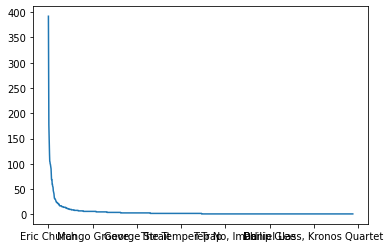

In [70]:
artists_listend_count.plot()

<AxesSubplot:ylabel='artist'>

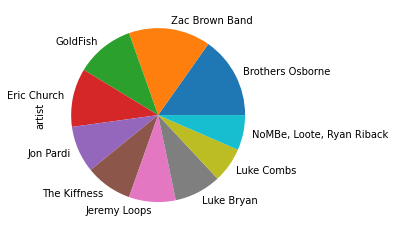

In [114]:
n = 10
df.last('1M').artist.value_counts().head(n=n).plot(kind='pie')

In [110]:
def artist_listen_times_array(artist, key):
    # {(day,hour): count}
    daily_list_times = df[df.artist == artist].groupby([key])["hour_of_day"].value_counts().to_dict()

    listen_x = max(df[key])+1

    day_time_tuples = [ele for key in daily_list_times for ele in key]

    year_listening_times = np.zeros((24,listen_x))


    for idx in range(0,len(day_time_tuples),2):
        day, hour = day_time_tuples[idx: idx+2]
        v = daily_list_times[(day,hour)]
        year_listening_times[hour][day] = v
        
    return year_listening_times

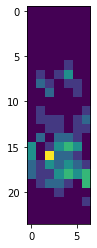

In [111]:
w_listening_times = artist_listen_times_array('Luke Bryan','weekday')
plt.imshow(w_listening_times)

Text(0.5, 1.0, 'Play Count over year')

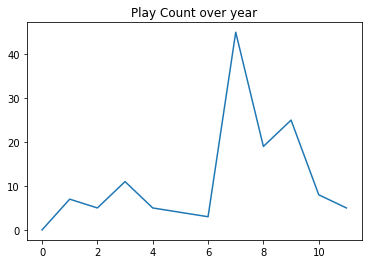

In [113]:
w_listening_times = artist_listen_times_array('GoldFish','month')
total = np.sum(w_listening_times, axis=0)#.reshape((1,12))
plt.plot(total)
plt.title("Play Count over year")

## Top Artist Jammed on The Weekend

# Songs

In [80]:
songs_listend_count = df['name'].value_counts()

In [81]:
print(f"Unique artists listend too {len(songs_listend_count)}")

Unique artists listend too 2633


In [86]:
songs_listend_count.head(n=20)

Aurora - Vocal Edit - David Scott                                  41
Never Gonna Forget (with Diplo feat. Elderbrook) - Black Coffee    38
That’s Damn Rock & Roll - Eric Church                              38
Starlight - Jon Pardi                                              32
Up Down (feat. Florida Georgia Line) - Morgan Wallen               31
Sleeve - Nate Smith                                                28
Glad To Be Here (feat. Brent Cobb) - Hailey Whitters               28
A Change Is Gonna Come - Los Coast                                 26
Hell Of A View - Eric Church                                       23
Hatin' Somebody - Brothers Osborne                                 23
Don't Cry - Morgan Wade                                            23
Nomi - The Kiffness                                                23
Know Some - Vandelux                                               23
Uwrongo - Edit - Various Artists                                   23
Don't Blink - Fancy 

song count and when it was played, maybe take the top 100 songs and get weekly play count 

song listened to weekly, monthly

## Listening times during the day

In [78]:
week_songs = df.last('7D').weekday.value_counts().to_dict()
month_songs = df.last('1M').weekday.value_counts().to_dict()

<BarContainer object of 7 artists>

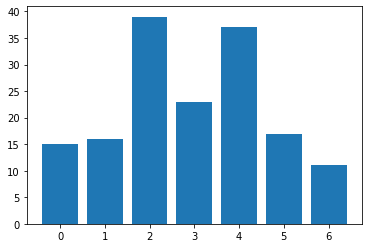

In [79]:
days = month_songs.keys()
song_count = month_songs.values()

plt.bar(days, song_count)

In [23]:
day_listening_times = df["hour_of_day"].value_counts().to_dict()

In [24]:
song_count_hours = np.zeros(24)
for k,v in day_listening_times.items():
    song_count_hours[k] = v

In [25]:
norm = np.linalg.norm(song_count_hours)

In [26]:
normaled = song_count_hours/norm

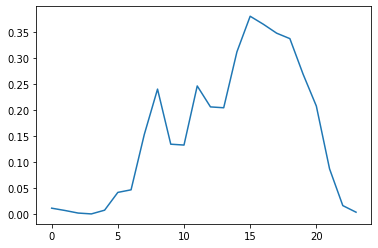

In [27]:
plt.plot(range(24), normaled)

In [28]:
def listen_times_array(key):
    # {(day,hour): count}
    daily_list_times = df.groupby([key])["hour_of_day"].value_counts().to_dict()

    listen_x = max(df[key])+1

    day_time_tuples = [ele for key in daily_list_times for ele in key]

    year_listening_times = np.zeros((24,listen_x))


    for idx in range(0,len(day_time_tuples),2):
        day, hour = day_time_tuples[idx: idx+2]
        v = daily_list_times[(day,hour)]
        year_listening_times[hour][day] = v
        
    return year_listening_times

In [29]:
daily_listening_times = listen_times_array('day_of_year')
plt.imshow(daily_listening_times)

In [31]:
monthly_listening_times = listen_times_array('month')
plt.imshow(monthly_listening_times)

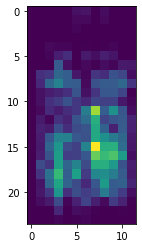

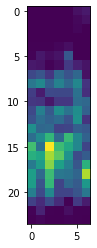

In [33]:
w_listening_times = listen_times_array('weekday')
plt.imshow(w_listening_times)